In [7]:
import sys
sys.path.append('..')
from core import project_root
projroot = project_root()
import warnings
warnings.filterwarnings("ignore")

In [8]:
from models import ToyModel

torch_model = ToyModel("cnn", 10)
torch_model.load("cnn")

MODEL LOADED!


DATA SAVED!
torch.Size([1, 1, 28, 28])


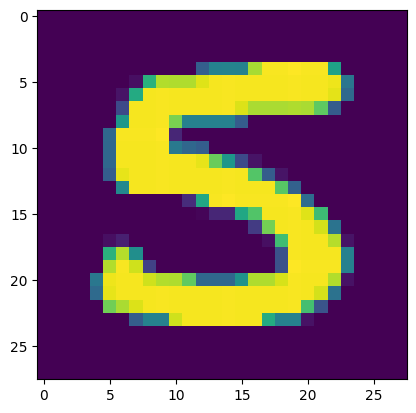

In [9]:
import matplotlib.pyplot as plt
from torch import Tensor
import torch

from datamodules.mnist import MnistDataset
from models import MNIST_CONFIG as config

dataset = MnistDataset(tobeloaded=False, params=config)
dataloader = dataset.train_dataloader(1)
batch: Tensor = next(iter(dataloader))[0]
img = batch[0]
plt.gca().imshow(img)
torch_input = batch.unsqueeze(1).to(torch.float32)
print(torch_input.shape)

tensor([ -9.4322,  -8.9459, -10.0250,   2.6564, -12.2008,  22.0769,  -6.8053,
         -4.4515,  -1.9269,   2.6567], grad_fn=<SelectBackward0>)


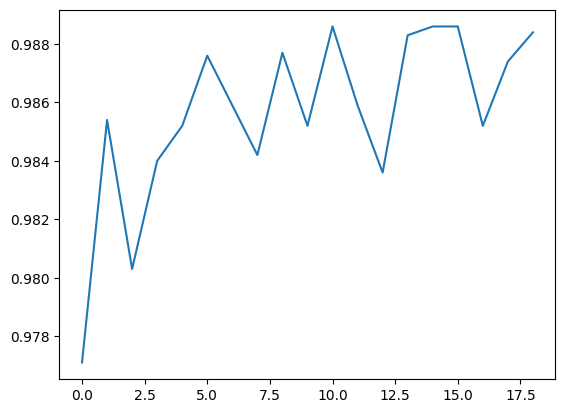

In [10]:
from core.trainer import Trainer
from models import TRAIN_CONFIG

# trainer = Trainer(params=TRAIN_CONFIG)
# trainer.fit(torch_model,dataset)
print(torch_model(torch_input)[0])
plt.plot(torch_model.test_scores, label=f'mnist - test scores')
plt.show()

In [11]:
from core import ExecutorchModel
from core import ONNXModel

torch_model.eval()
executorchmodel = ExecutorchModel(torch_model)
onnxmodel = ONNXModel(torch_model)

INFO:executorch.backends.xnnpack.partition.xnnpack_partitioner:Found 3 subgraphs to be partitioned.


GraphModule(
  (lowered_module_0): LoweredBackendModule()
  (lowered_module_1): LoweredBackendModule()
  (lowered_module_2): LoweredBackendModule()
)



def forward(self, arg10_1):
    lowered_module_0 = self.lowered_module_0
    executorch_call_delegate = torch.ops.higher_order.executorch_call_delegate(lowered_module_0, arg10_1);  lowered_module_0 = arg10_1 = None
    getitem = executorch_call_delegate[0];  executorch_call_delegate = None
    lowered_module_1 = self.lowered_module_1
    executorch_call_delegate_1 = torch.ops.higher_order.executorch_call_delegate(lowered_module_1, getitem);  lowered_module_1 = getitem = None
    getitem_1 = executorch_call_delegate_1[0];  executorch_call_delegate_1 = None
    aten_view_copy_default = executorch_exir_dialects_edge__ops_aten_view_copy_default(getitem_1, [1, 256]);  getitem_1 = None
    lowered_module_2 = self.lowered_module_2
    executorch_call_delegate_2 = torch.ops.higher_order.executorch_call_delegate(lowered_module_2, aten_view_copy

In [12]:
import time
import numpy as np

onnx_elapsed = []
torch_elapsed = []

start = time.time()
onnxmodel(torch_input)
end = time.time()
onnx_elapsed.append((end-start)) 

start = time.time()
torch_model(torch_input)
end = time.time()
torch_elapsed.append((end-start))

print(np.mean(onnx_elapsed) * 1000)
print(np.mean(torch_elapsed) * 1000)

0.5769729614257812
17.976999282836914
